<a href="https://colab.research.google.com/github/Ujju09/cour/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ujjwal Jayswal,**
**16215,**
**Group-6**

In [ ]:
import numpy as np
import sys

Q1. Matrix multiplication

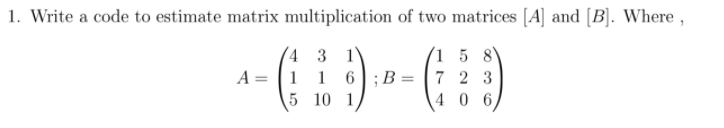

In [32]:
A = np.array([[4, 3, 1],
              [1, 1, 6],
              [5, 10, 1]])

B = np.array([[1, 5, 8],
              [7, 2, 3],
              [4, 0, 6]])

# Checking for compatibility

if A.shape[1] != B.shape[0]:
    print('Matrices not compatible!')

C = np.zeros((A.shape[0], B.shape[1]))

for i in range(A.shape[0]):
    for j in range(B.shape[1]):
        for k in range(B.shape[0]):
            C[i][j]+=A[i][k]*B[k][j]

print(f'The matrix multiplication is:\n {C}') 

The matrix multiplication is:
 [[29. 26. 47.]
 [32.  7. 47.]
 [79. 45. 76.]]


Q2.Solving a system of linear equation using gauss elimination.

In [38]:
def gauss(a, b, n, tol):
    er = 0
    s = np.max(np.abs(a), axis=1)
    
    # Applying Gauss Elimination
    er = eliminate_gauss(a, b, n, s, tol, er)
    
    if er != -1:
        # Back Substitution
        x = substitute_gauss(a, b, n)
        print(f'\nThe solution is: ')
        for i in range(n):
            print('x%d = %.4f' %(i, x[i]), end = '\t')
    else:
        print(f'\nCannot compute! Singular matrix detected!')

def eliminate_gauss(a, b, n, s, tol, er):
    for k in range(n-1):
        # Pivoting
        pivot_gauss(a, b, n, s, k)
        
        # Monitor diagonal term
        if abs(a[k, k]/s[k]) < tol:
            er = -1
            break
        
        fac = (a[k+1:, k]/a[k, k]).reshape(-1, 1)
        a[k+1:, k+1:] = a[k+1:, k+1:] - fac*(a[k, k+1:].reshape(1, -1))
        b[k+1:] = b[k+1:] - (np.squeeze(fac))*b[k]
    if abs(a[n-1, n-1]/s[n-1]) < tol:
        er = -1
    
    return er

def pivot_gauss(a, b, n, s, k):
    p = k+np.argmax(np.abs(a[k:, k]/s[k:]))
    if p != k:
        # Swap rows p and k
        dummy = np.copy(a[p, k:]) # in a
        a[p, k:] = a[k, k:]
        a[k, k:] = dummy
        dummy = np.copy(b[p])     # in b
        b[p] = b[k]
        b[k] = dummy
        dummy = np.copy(s[p])     # in s
        s[p] = s[k]
        s[k] = dummy

def substitute_gauss(a, b, n):
    x = np.zeros(n)
    x[-1] = b[-1]/a[-1, -1]
    for i in reversed(range(n-1)):
        sum_ = np.sum(a[i, i+1:] * x[i+1:])
        x[i] = (b[i] - sum_) / a[i, i]
    
    return x

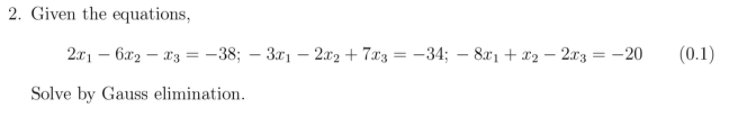

In [45]:
a = np.array([[2., -6., -1.],
              [-3., -2., 7.],
              [-8., 1., -2.]])
b = np.array([-38., -34., -20.])
n = 3
tol = 1e-5


for i in range(n):
    print(f'{a[i,0]}x0 + {a[i,1]}x1 + {a[i,2]}x2 = {b[i]}' )

print('\nSolving by Gauss elimination...')

gauss(a, b, n, tol)

2.0x0 + -6.0x1 + -1.0x2 = -38.0
-3.0x0 + -2.0x1 + 7.0x2 = -34.0
-8.0x0 + 1.0x1 + -2.0x2 = -20.0

Solving by Gauss elimination...

The solution is: 
x0 = 3.7299	x1 = 7.7506	x2 = -1.0442	

Q3. Finding inverse of a given matrix

In [40]:
def decompose_lu(a, n, o, s, tol, er):
    for k in range(n-1):
        # Pivoting
        pivot_lu(a, n, o, s, k)
        
        # Monitor diagonal term
        if abs(a[o[k], k]/s[o[k]]) < tol:
            er = -1
            print(a[o[k], k]/s[o[k]])
            break
        
        fac = (a[o[k+1:], k]/a[o[k], k]).reshape(-1, 1)
        a[o[k+1:], k] = np.squeeze(fac)
        a[o[k+1:], k+1:] = a[o[k+1:], k+1:] - fac*(a[o[k], k+1:].reshape(1, -1))
    
    if abs(a[o[n-1], n-1]/s[o[n-1]]) < tol:
        er = -1
        print(a[o[k], k]/s[o[k]])
    
    return er

def pivot_lu(a, n, o, s, k):
    p = k+np.argmax(np.abs(a[o[k:], k]/s[o[k:]]))
    if p != k:
        # Swap rows p and k
        dummy = np.copy(o[p])     # in o
        o[p] = o[k]
        o[k] = dummy

def substitute_lu(a, n, o, s, b):
    for i in range(1, n):
        sum_ = np.sum(a[o[i], :i] * b[o[:i]])
        b[o[i]] = b[o[i]] - sum_
    
    x = np.zeros(n)
    x[-1] = b[o[-1]]/a[o[-1], -1]
    for i in reversed(range(n-1)):
        sum_ = np.sum(a[o[i], i+1:] * x[i+1:])
        x[i] = (b[o[i]] - sum_) / a[o[i], i]
    
    return x

def LUinverse(a, n, tol):
    er = 0
    o = np.arange(n)
    s = np.max(np.abs(a), axis=1)
    
    er = decompose_lu(a, n, o, s, tol, er)
    
    ai = np.zeros(a.shape)
    if er == 0:
        for i in range(n):
            b = np.zeros(n)
            b[i] = 1
            x = substitute_lu(a, n, o, s, b)
            ai[:, i] = x
        np.set_printoptions(formatter={'float': lambda ai: "{0:.5f}".format(ai)})
        print('\nThe inverse of the given matrix is:\n' + str(ai))
    else:
        print('\null-conditioned system!')

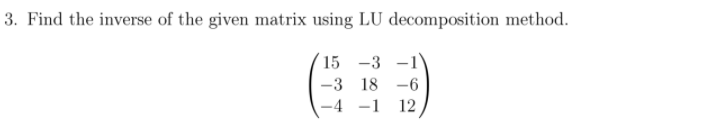

In [41]:
a = np.array([[15., -3., -1.],
              [-3., 18., -6.],
              [-4., -1., 12.]])
n = 3
tol = 1e-5

# --------

print(f'Given matrix:\n{a}' )

print('\nFinding inverse using LU decomposition method...')

LUinverse(a, n, tol)
np.set_printoptions()

Given matrix:
[[15. -3. -1.]
 [-3. 18. -6.]
 [-4. -1. 12.]]

Finding inverse using LU decomposition method...

The inverse of the given matrix is:
[[0.07254 0.01278 0.01244]
 [0.02073 0.06079 0.03212]
 [0.02591 0.00933 0.09016]]


**Q4**. 
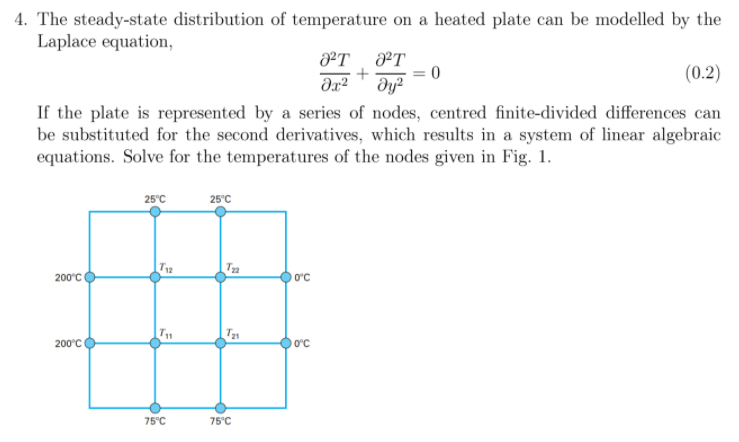

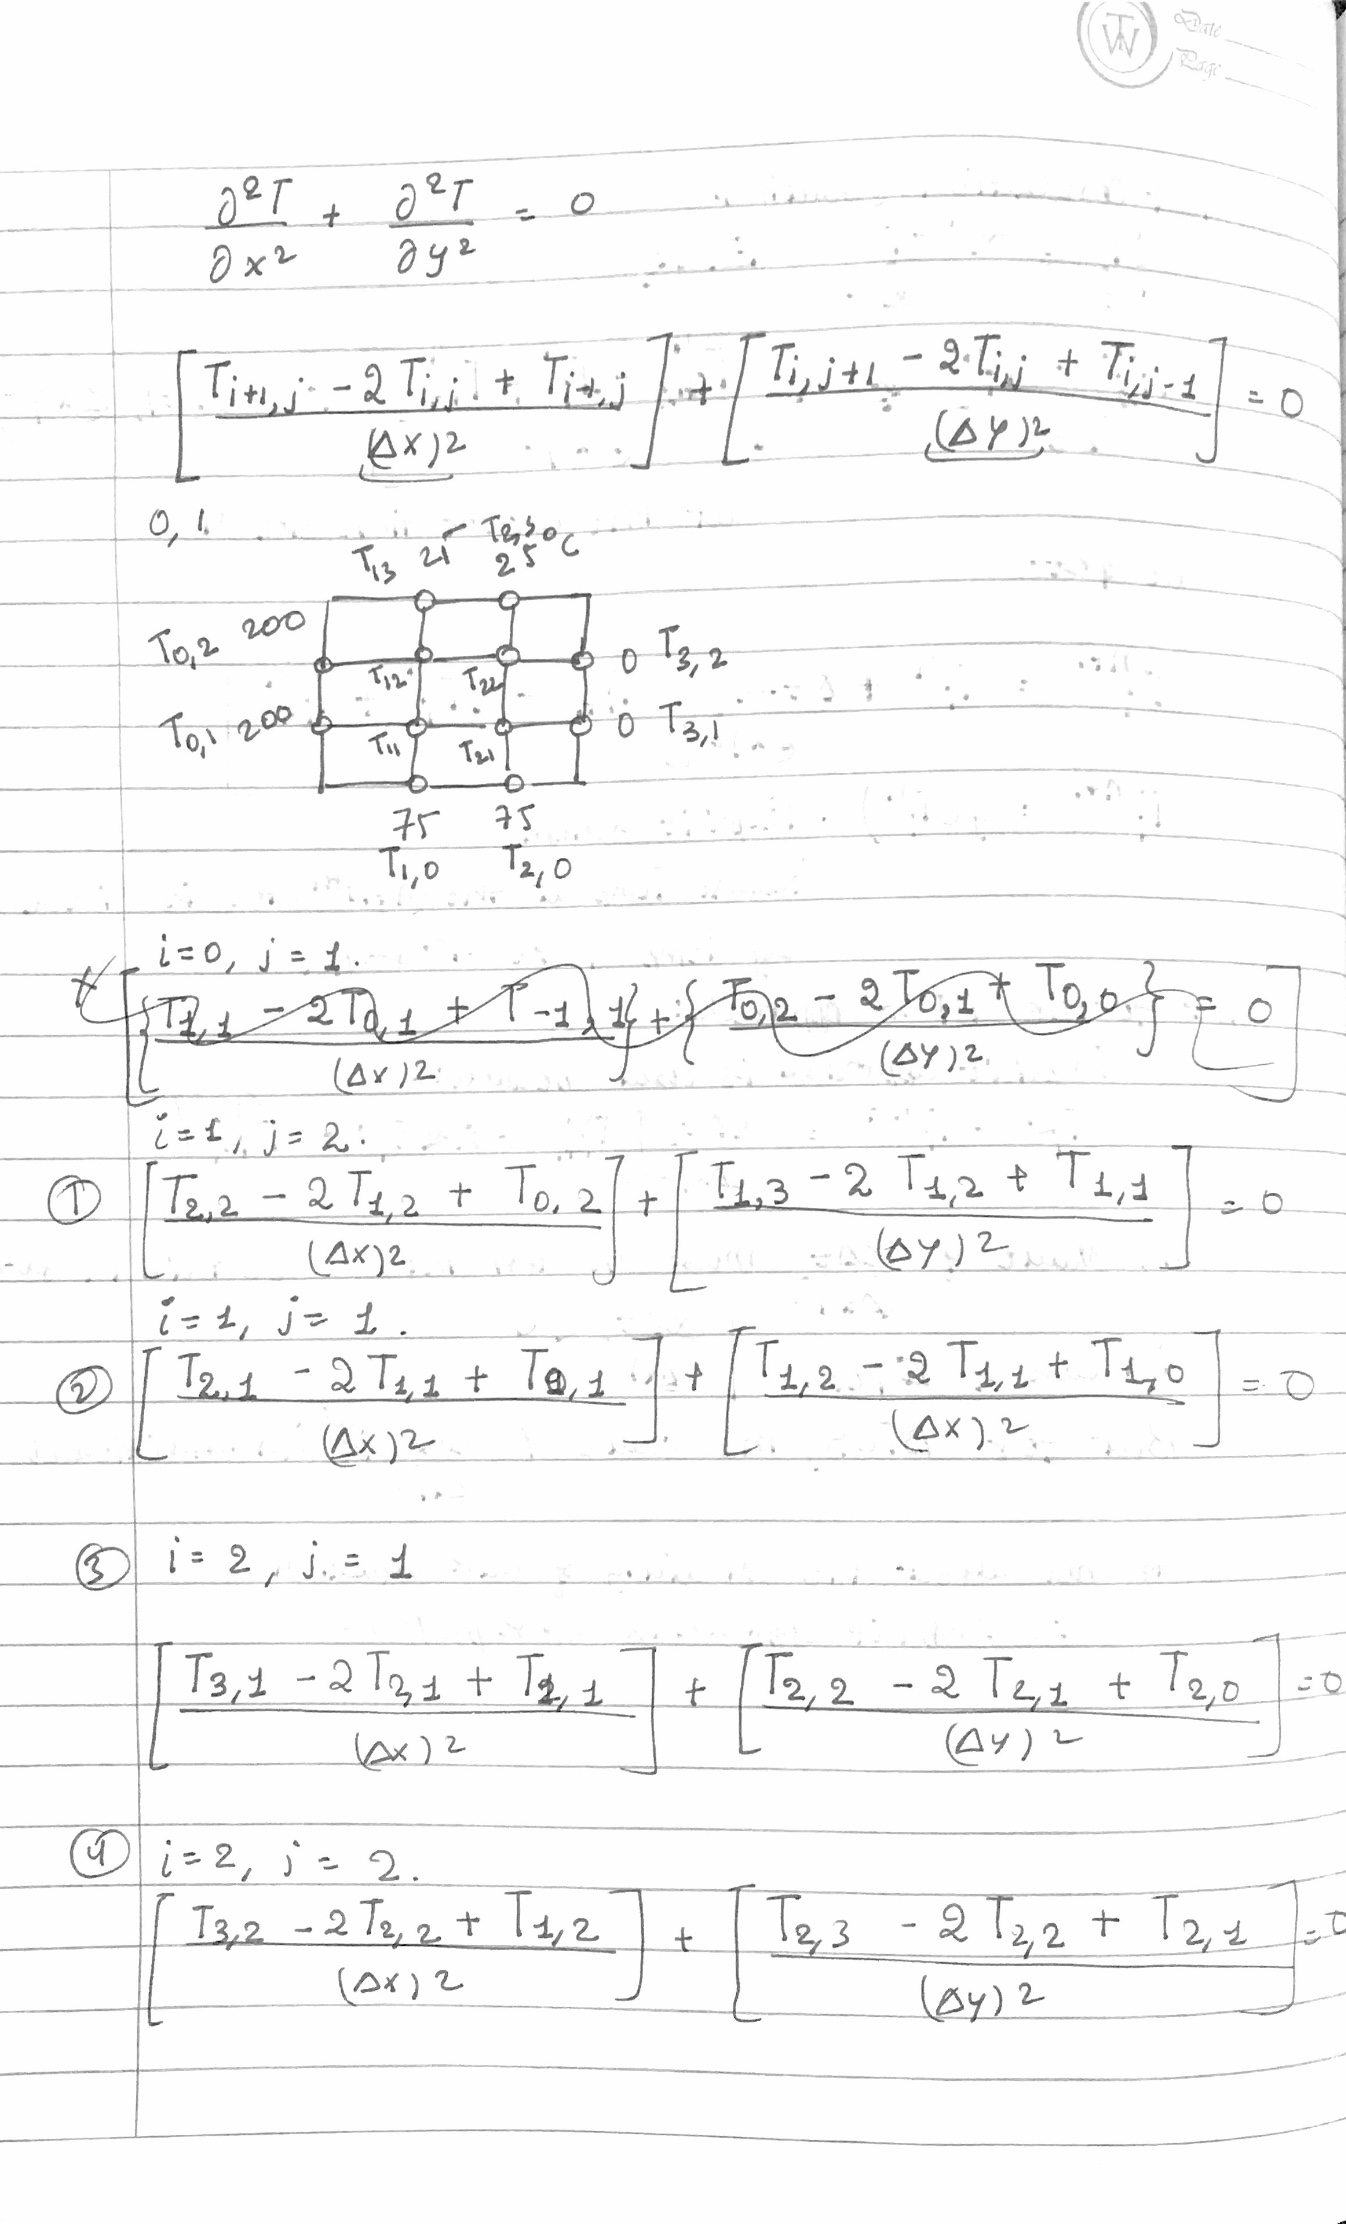

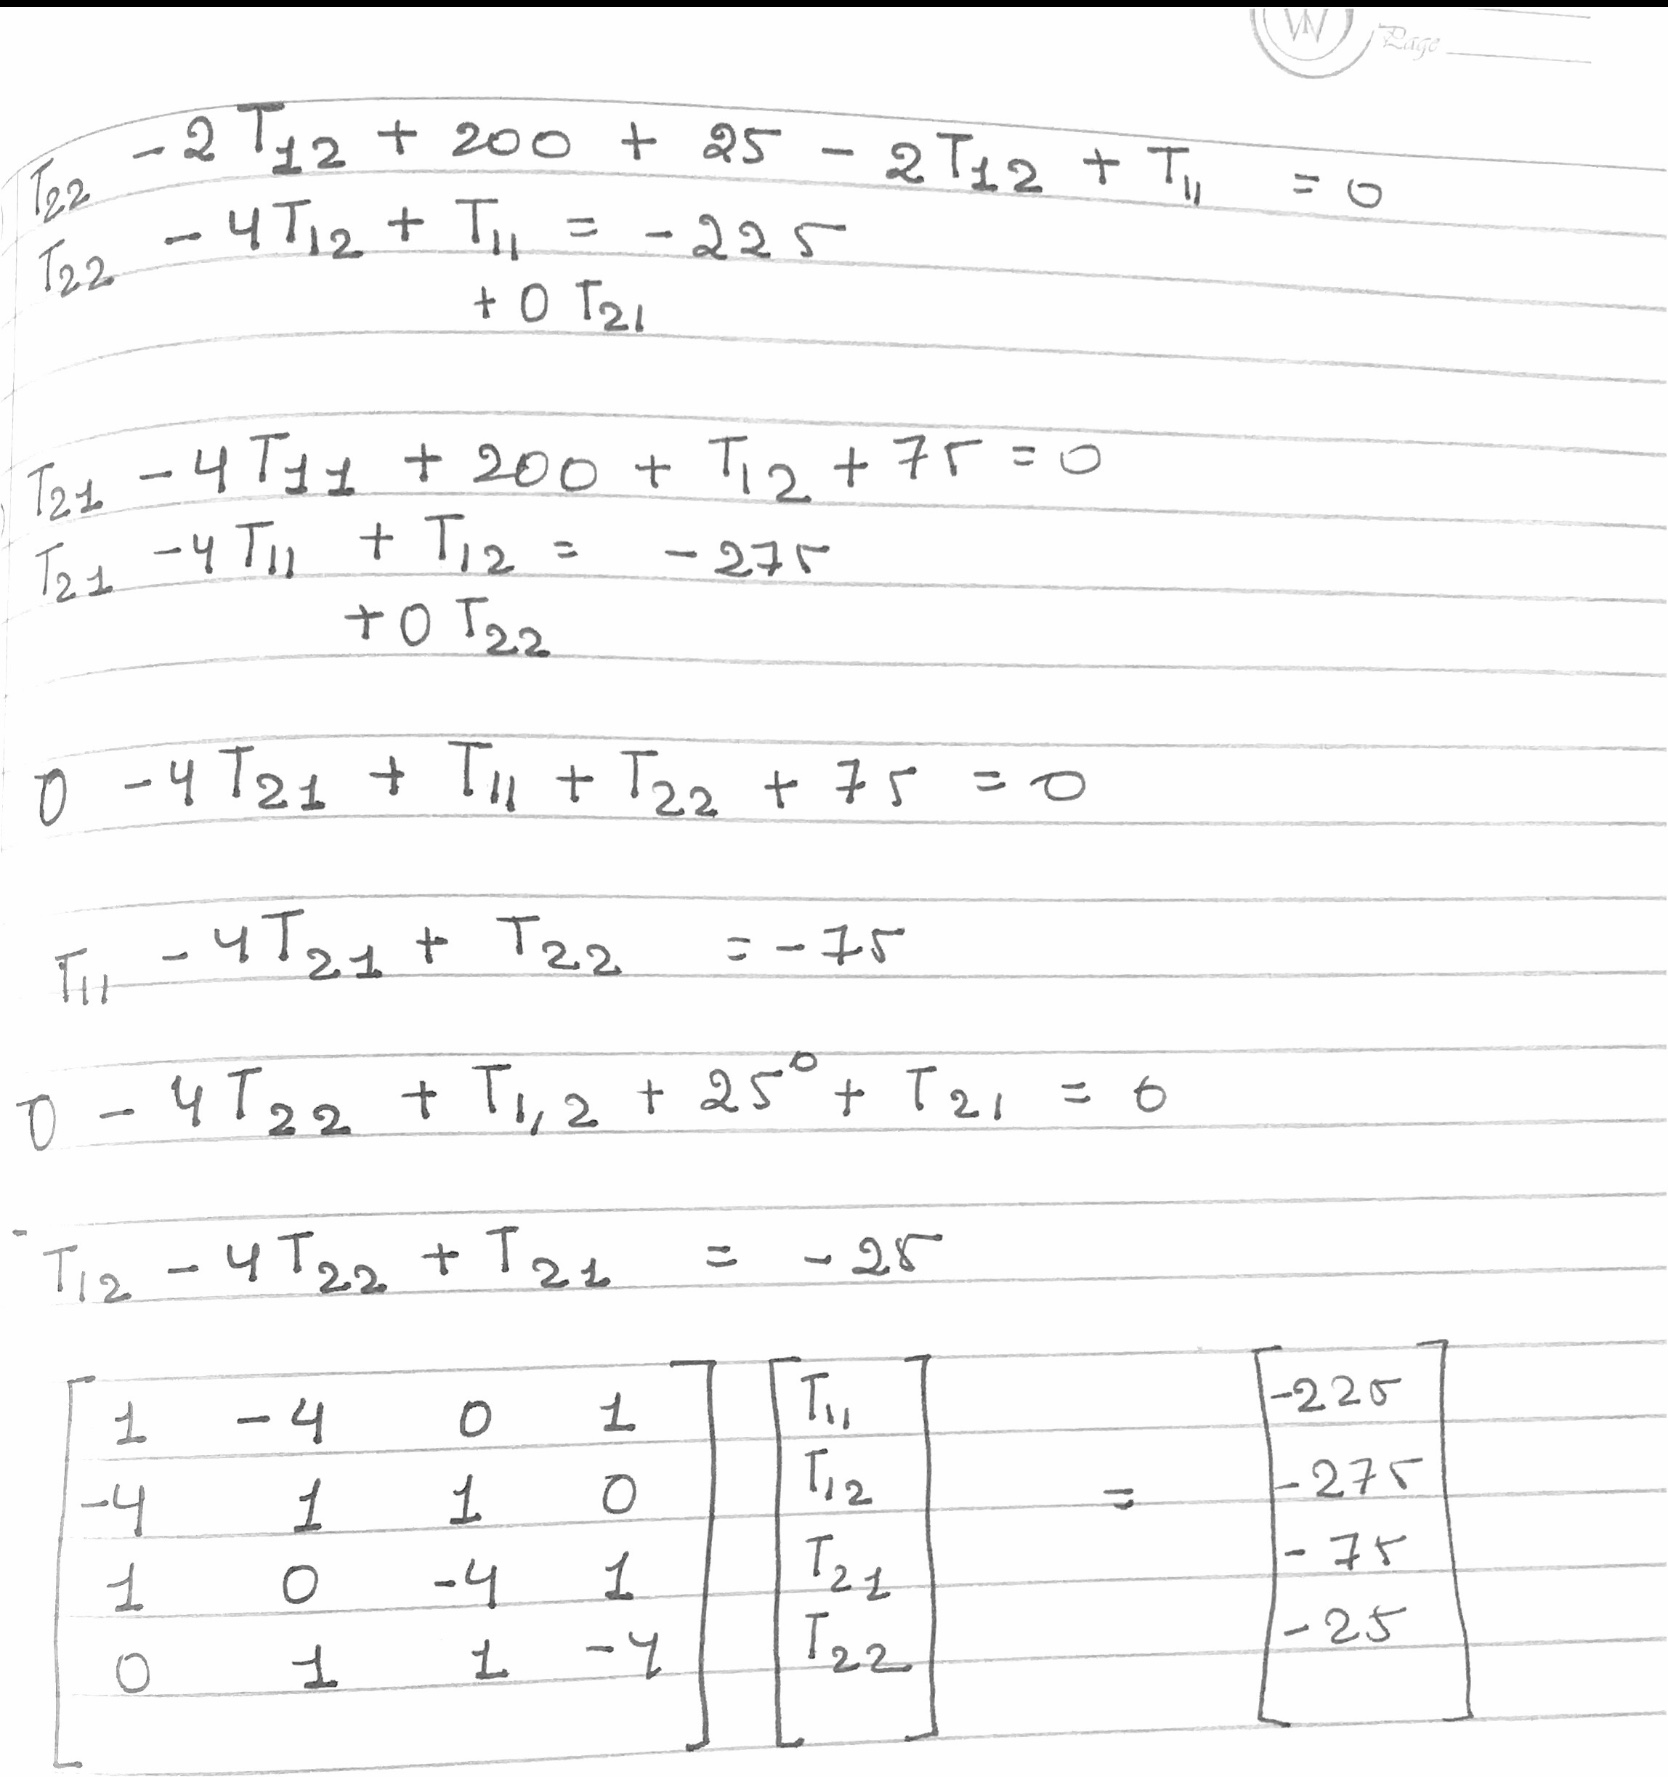

In [46]:
A = np.array([[1., -4., 0., 1.],
              [-4., 1., 1., 0.],
              [1., 0., -4., 1.],
              [0., 1., 1., -4.]])
B = np.array([-225., -275., -75., -25.])
n = 4
tol = 1e-5

# --------

print('Given system of equations:')
for i in range(n):
    print(f'{A[i,0]}x0 + {A[i,1]}x1 + {A[i,2]}x2 + {A[i,3]}x3 = {B[i]}' )
gauss(A, B, n, tol)

Given system of equations:
1.0x0 + -4.0x1 + 0.0x2 + 1.0x3 = -225.0
-4.0x0 + 1.0x1 + 1.0x2 + 0.0x3 = -275.0
1.0x0 + 0.0x1 + -4.0x2 + 1.0x3 = -75.0
0.0x0 + 1.0x1 + 1.0x2 + -4.0x3 = -25.0

The solution is: 
x0 = 106.2500	x1 = 93.7500	x2 = 56.2500	x3 = 43.7500	